In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset from https://www.kaggle.com/zhijinzhai/loandata
df = pd.read_csv('csv/loan_payments.csv')

In [3]:
df.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


In [4]:
df1 = df[['loan_status','age','education','Gender']].replace({'Bechalor':'Bachelor','college':'College'})

In [5]:
df1.head(10)

,loan_status,age,education,Gender
0,PAIDOFF,45,High School or Below,male
1,PAIDOFF,50,Bachelor,female
2,PAIDOFF,33,Bachelor,female
3,PAIDOFF,27,College,male
4,PAIDOFF,28,College,female
5,PAIDOFF,35,Master or Above,male
6,PAIDOFF,29,College,male
7,PAIDOFF,36,College,male
8,PAIDOFF,28,College,male
9,PAIDOFF,26,College,male


In [6]:
# Education levels of Borrowers

education_percentage = df1.groupby('education').count()['loan_status']

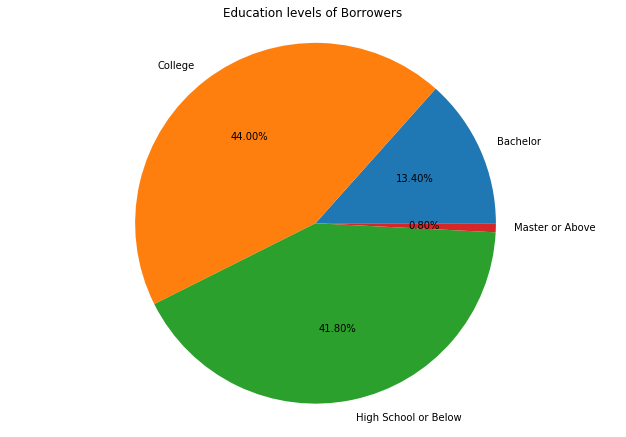

In [7]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.4,1.4])
plt.pie(education_percentage,labels=education_percentage.index,autopct='%0.2f%%')
plt.title('Education levels of Borrowers')
plt.axis('equal')
plt.show()

In [8]:
# Gender of Borrowers

gender_percentage = df1.groupby('Gender').count()['loan_status']

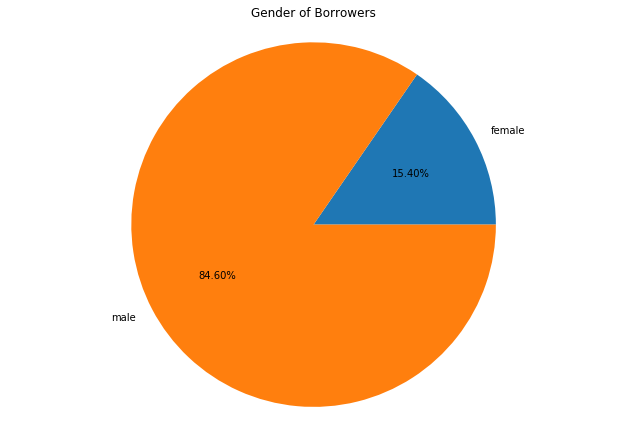

In [9]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.4,1.4])
plt.pie(gender_percentage,labels=gender_percentage.index,autopct='%0.2f%%')
plt.title('Gender of Borrowers')
plt.axis('equal')
plt.show()

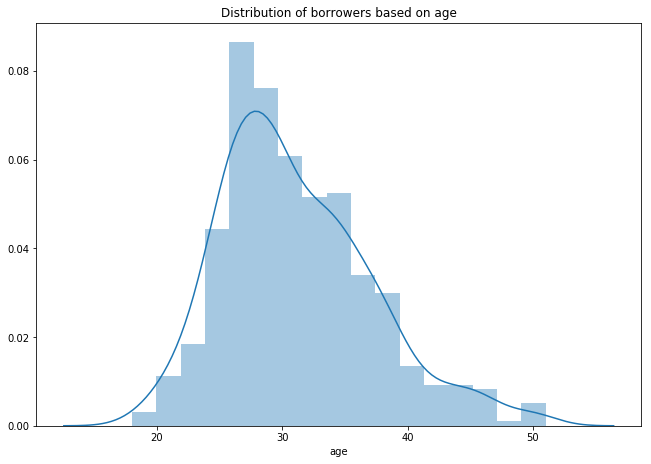

In [10]:
# Distribution of borrowers based on age

fig = plt.figure()

ax = fig.add_axes([0,0,1.4,1.4])
sns.distplot(df1['age'],ax=ax)
plt.title('Distribution of borrowers based on age')
plt.show()

In [11]:
# Education level of borrower where loan is in Collection

collection = df1[df1['loan_status']=='COLLECTION']
collection_education = collection.groupby('education').count()['loan_status']

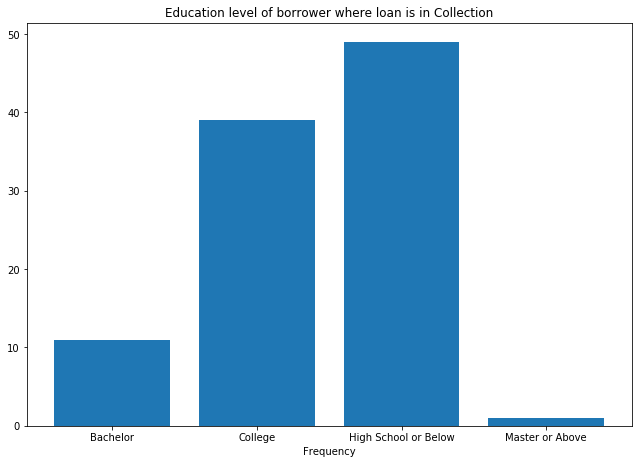

In [12]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.4,1.4])
ax.bar(collection_education.index,collection_education)
ax.set_title('Education level of borrower where loan is in Collection')
ax.set_xlabel('Frequency')
plt.show()